In [406]:
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime

In [407]:
with open('baobee_foodie.json') as reader:
    metadata = json.load(reader)    
result = json_normalize(metadata)

In [408]:
df = result[['edge_media_to_caption.edges', 'edge_media_preview_like.count', 'edge_media_to_comment.count', 'location.name', 'location.address_json', "taken_at_timestamp"]]
df.rename(columns= {'edge_media_to_caption.edges':'content', 'edge_media_preview_like.count':'likes', 'edge_media_to_comment.count':'comments','location.name':'loc','location.address_json':'address', 'taken_at_timestamp':'time'}, inplace = True )

In [409]:
df.loc[:,'time'] = df.loc[:,'time'].map(lambda x: datetime.fromtimestamp(x))
df['weekdays'] = df.loc[:,'time'].map(lambda x: x.weekday()+1)
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [410]:
loc_list = [i for i in df['address'].str.split("\"")]
city_list = []
for i in range(len(loc_list)):
    try:
        for j in range(len(loc_list[i])):
            if loc_list[i][j] == 'city_name':
                city_list.append(loc_list[i][j+2])  
    except:
        loc_list.append(NaN)
for i in range(len(city_list)):
    if city_list[i] == '':
        city_list[i] = 'Taipei, Taiwan'
df['city'] = pd.Series(city_list)
df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,content,likes,comments,loc,address,time,weekdays,city
0,[{'node': {'text': '👣台北 x 中山國中站 ｜汝菓｜ 🍠大甲芋頭鮮乳 $...,155,6,汝菓,"{""street_address"": ""\u5408\u6c5f\u885779-1\u86...",2019-06-04 21:18:08,2,"Taipei, Taiwan"
1,[{'node': {'text': '👣新竹 x 東區 ｜謝牡丹炒泡麵｜ 🧀️起司年糕蛋炒...,300,13,謝牡丹炒泡麵（東門市場）,"{""street_address"": ""\u6771\u5340\u6771\u9580\u...",2019-06-02 21:42:15,7,"Hsinchu, Taiwan"
2,[{'node': {'text': '👣台北 x 忠孝敦化站 ｜北門鳳李冰｜ 🍦混搭（芋頭...,417,17,北門鳳李冰,"{""street_address"": ""\u5fe0\u5b5d\u6771\u8def\u...",2019-06-01 21:51:39,6,"Taipei, Taiwan"
3,[{'node': {'text': 'ᴰᴬᵞ ⁸⁶⁵ 👃🏻：可是我認真喜歡星星那副欸（誤）...,239,6,Owndays,"{""street_address"": """", ""zip_code"": """", ""city_n...",2019-05-31 11:17:27,5,"Taipei, Taiwan"
4,[{'node': {'text': '👣台北 x 大安站 ｜NUTTEA｜ 🥭芒芒堅果奶蓋...,681,47,NUTTEA Nut Mylk Tea 堅果奶茶,"{""street_address"": ""\u53f0\u5317\u5e02\u5927\u...",2019-05-30 21:31:04,4,"Taipei, Taiwan"
5,[{'node': {'text': '👣彰化 x 宅配 ｜麥仕佳｜ 🍠鮮芋奶酪蛋糕 $27...,856,36,麥仕佳專業烘培坊,"{""street_address"": ""\u5f70\u5316\u5e02\u4e2d\u...",2019-05-29 21:55:51,3,Changhua
6,[{'node': {'text': '👣台北 x 大安站 ｜麻吉迷你鯛魚燒｜ 🐟綜合鯛魚燒...,1121,40,麻吉迷你鯛魚燒,"{""street_address"": ""\u5927\u5b89\u5340\u5927\u...",2019-05-27 21:58:58,1,"Taipei, Taiwan"
7,[{'node': {'text': '👣台北 x 中山國中站 ｜邱太太甜品坊｜ 🍠招牌芋泥...,412,22,邱太太甜品坊,"{""street_address"": ""\u4e2d\u5c71\u5340\u9f8d\u...",2019-05-26 21:27:25,7,"Taipei, Taiwan"
8,[{'node': {'text': '👣台北 x 六張犁站 ｜富士咖哩｜ 🗻富士咖哩(牛肉...,1523,68,富士咖哩 Fuji Curry,"{""street_address"": ""\u5927\u5b89\u5340\u81e5\u...",2019-05-24 21:50:08,5,"Taipei, Taiwan"
9,[{'node': {'text': '👣台北 x 東門站 ｜金金良甜｜ 🍧流沙紫薯芋泥冰 ...,664,42,JinJin金金良甜-甜冰品專賣,"{""street_address"": ""\u9e97\u6c34\u88577\u5df71...",2019-05-23 21:51:43,4,"Taipei, Taiwan"


In [411]:
col = ['content', 'likes', 'comments', 'loc','city', 'address', 'time',
       'weekdays']
df = df[col]

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [458]:
ColorSet1 = ["#ffdf9e" , "#ffc273", "#e56969", "#c1558b", "#8a49a1"]

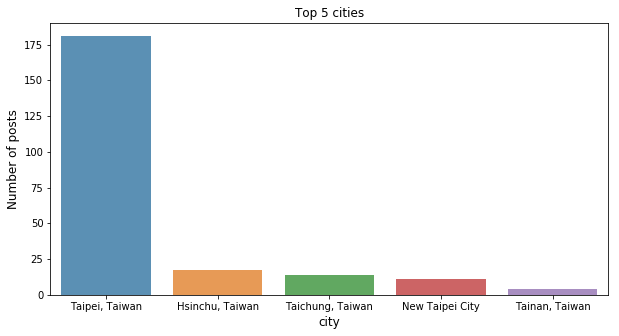

In [447]:
city_count  = df['city'].value_counts()
city_count = city_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top 5 cities')
plt.ylabel('Number of posts', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

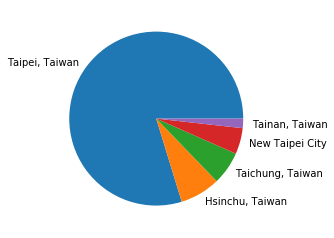

<Figure size 864x720 with 0 Axes>

In [448]:
fig1, ax1 = plt.subplots()
plt.figure(figsize=(12,10))
ax1.pie(city_count.values , labels = city_count.index)
plt.show()

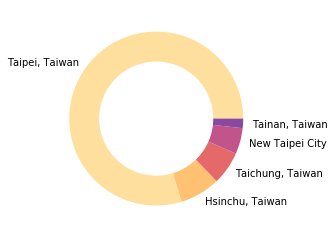

In [459]:
my_circle=plt.Circle( (0,0), 0.65, color='white')
plt.pie(city_count.values, labels = city_count.index, colors = ColorSet1)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
